<h1><center>Lab 3: Clustering</center></h1>
<h3><center>A Deeper Analysis of Covid-19 Data</center></h3>
<p><center>DS 7331</center></p>
<p><center>Created by Sadik Aman, Dawn Bowerman, Zachary Harris, Alexandre Jasserme</center></p>

<p><center>Sections of this code was adapted from: 
    <li>https://github.com/jakemdrew/DataMiningNotebooks</li>
  <li>https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html</li>
    <li>https://www.geeksforgeeks.org/ml-mini-batch-k-means-clustering-algorithm</li>
    <li>https://andrewm4894.com/2020/09/03/time-series-clustering-with-tslearn/</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html</li>
    <li>https://www.scikit-yb.org/en/latest/api/cluster/elbow.html</li>
    <li>https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas</li>
    <li>https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py</li>
    <li>https://www.scikit-yb.org/en/latest/api/cluster/icdm.html</li>


## Business Understanding 1

### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?)

This dataset is published in the 'Our World in Data' website which is a collection of existing datasets. 
Source: https://github.com/owid/covid-19-data/tree/master/public/data 
Citation:
Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]

>This dataset was partially obtained from:
The Covid-19 Data Repository which is for the Coronavirus Visual Dashboard by the Center for Systems Science and Engineering at Johns Hopkins University.  The data has been accumulated from many official sources, which are documented on the github, since January 22, 2020 on confirmed Covid-19 cases and deaths for all countries.  https://github.com/CSSEGISandData/COVID-19
Other attributes were from official government reports documented in the codebook. There were originally 67 attributes and 154,105 records.  They are presented below with descriptions from the website:

>**Confirmed cases**                                                      
total_cases: 	                               		Total confirmed cases of COVID-19,
new_cases: 				New confirmed cases of COVID-19<br>
new_cases_smoothed:			New confirmed cases of COVID-19 (7-day smoothed)<br>
total_cases_per_million: 			Total confirmed cases of COVID-19 per 1,000,000 people<br>
new_cases_per_million: 			New confirmed cases of COVID-19 per 1,000,000 people<br>
new_cases_smoothed_per_million: 		New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people<br>


>**Confirmed deaths**<br>
total_deaths: 				Total deaths attributed to COVID-19<br>
new_deaths: 				New deaths attributed to COVID-19<br>
new_deaths_smoothed: 			New deaths attributed to COVID-19 (7-day smoothed)<br>
total_deaths_per_million: 			Total deaths attributed to COVID-19 per 1,000,000 people<br>
new_deaths_per_million: 			New deaths attributed to COVID-19 per 1,000,000 people<br>
new_deaths_smoothed_per_million: 		New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people<br>



>**Excess mortality**<br>
excess_mortality: 				Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the 							projected number of deaths for the same period based on previous years.<br> 
excess_mortality_cumulative: 			Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative 						projected deaths for the same period based on previous years.<br> 
excess_mortality_cumulative_absolute: 		Cumulative difference between the reported number of deaths since 1 January 2020 and the projected 							number of deaths for the same period based on previous years.<br> 
excess_mortality_cumulative_per_million: 	Cumulative difference between the reported number of deaths since 1 January 2020 and the projected 							number of deaths for the same period based on previous years, per million people.<br> 


>**Hospital & ICU**<br>
icu_patients: 				Number of COVID-19 patients in intensive care units (ICUs) on a given day<br>
icu_patients_per_million: 			Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people<br>
hosp_patients: 				Number of COVID-19 patients in hospital on a given day<br>
hosp_patients_per_million: 			Number of COVID-19 patients in hospital on a given day per 1,000,000 people<br>
weekly_icu_admissions: 			Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week<br>
weekly_icu_admissions_per_million: 		Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 					people<br>
weekly_hosp_admissions: 			Number of COVID-19 patients newly admitted to hospitals in a given week<br>
weekly_hosp_admissions_per_million: 		Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people<br>


>**Policy responses**<br>
stringency_index: 				Government Response Stringency Index: composite measure based on 9 response indicators including 							school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest 							response)<br>

>**Reproduction rate**<br>
reproduction_rate:				Real-time estimate of the effective reproduction rate (R) of COVID-19.
The basic reproduction number, also known as the R or R0, is the average number of people one person with an infectious disease will likely infect in the future.
<br>


>**Tests & positivity**<br>
total_tests: 				Total tests for COVID-19<br>
new_tests: 				New tests for COVID-19 (only calculated for consecutive days)<br>
total_tests_per_thousand: 			Total tests for COVID-19 per 1,000 people<br>
new_tests_per_thousand: 			New tests for COVID-19 per 1,000 people<br>
new_tests_smoothed: 			New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we 							assume that testing changed equally on a daily basis over any periods in which no data was reported. This 							produces a complete series of daily figures, which is then averaged over a rolling 7-day window<br>
new_tests_smoothed_per_thousand: 		New tests for COVID-19 (7-day smoothed) per 1,000 people<br>
positive_rate: 				The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of 					tests_per_case)<br>
tests_per_case: 				Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of 					positive_rate)<br>
tests_units: 				Units used by the location to report its testing data<br>


>**Vaccinations**<br>
total_vaccinations: 				Total number of COVID-19 vaccination doses administered<br>
people_vaccinated: 				Total number of people who received at least one vaccine dose<br>
people_fully_vaccinated: 			Total number of people who received all doses prescribed by the vaccination protocol<br>
total_boosters: 				Total number of COVID-19 vaccination booster doses administered (doses administered beyond the 							number prescribed by the vaccination protocol)<br>
new_vaccinations: 				New COVID-19 vaccination doses administered (only calculated for consecutive days)<br>
new_vaccinations_smoothed: 			New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report 							vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any 							periods in which no data was reported. This produces a complete series of daily figures, which is then 							averaged over a rolling 7-day window<br>
total_vaccinations_per_hundred: 		Total number of COVID-19 vaccination doses administered per 100 people in the total population<br>
people_vaccinated_per_hundred: 		Total number of people who received at least one vaccine dose per 100 people in the total population<br>
people_fully_vaccinated_per_hundred: 		Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the 					total population<br>
total_boosters_per_hundred: 			Total number of COVID-19 vaccination booster doses administered per 100 people in the total population<br>
new_vaccinations_smoothed_per_million: 	New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total 							population<br>
new_people_vaccinated_smoothed: 		Daily number of people receiving their first vaccine dose (7-day smoothed)<br>
new_people_vaccinated_smoothed_per_hundred: 	Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total 							population<br>


>**Others**<br>
iso_code: 					ISO 3166-1 alpha-3 – three-letter country codes<br>
continent: 					Continent of the geographical location<br>
location: 					Geographical location<br>
date: 					Date of observation<br>
population: 				Population (latest available values)<br> 
population_density: 				Number of people divided by land area, measured in square kilometers, most recent year available<br>
median_age: 				Median age of the population, UN projection for 2020<br>
aged_65_older: 				Share of the population that is 65 years and older, most recent year available<br>
aged_70_older: 				Share of the population that is 70 years and older in 2015<br>
gdp_per_capita: 				Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year 						available<br>
extreme_poverty: 				Share of the population living in extreme poverty, most recent year available since 2010<br>
cardiovasc_death_rate: 			Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)<br>
diabetes_prevalence: 			Diabetes prevalence (% of population aged 20 to 79) in 2017<br>
female_smokers: 				Share of women who smoke, most recent year available<br>
male_smokers: 				Share of men who smoke, most recent year available<br>
handwashing_facilities: 			Share of the population with basic handwashing facilities on premises, most recent year available<br>
hospital_beds_per_thousand: 			Hospital beds per 1,000 people, most recent year available since 2010<br>
life_expectancy: 				Life expectancy at birth in 2019<br>
human_development_index: 			A composite index measuring average achievement in three basic dimensions of human development—a 							long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from 							http://hdr.undp.org/en/indicators/137506<br>


### How would you measure the effectiveness of a good algorithm?<br>
We are planning to cluster on the relevant numeric features on the dataset (i.e. not highly correlated or with a lot of missing data).
To compare the different clustering algorithms and measure their effectiveness, we will use the silhouette score.

### Why does your chosen validation method make sense for this specific dataset and the stakeholders needs? <br>
The silouhette score considers both the similarity of an object to its own cluster (cohesion) and the comparison to other clusters (separation) so we believe this metric is balanced enough to provide an appropriate evaluation of the best clustering algorithm.

## Data Understanding 1

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.  

The source dataset contains 154105 observations and 67 attributes. As there are attributes in this dataset that are updated daily, the data used in this report was downloaded from the source on January 15, 2022 at 1:00 PM CST. In order to analyze the data for this report, some attributes in the dataset were manipulated or eliminated. Table 1 outlines the final list of attributes used for this report and descriptions for each.



<p><center>Table 1: Attributes</center></p>

| Variable Name                  | Data Type | Description                                                                                                                                                                                                                                                                                                                                           |
|--------------------------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| continent                      | object    | Continent of the geographical location                                                                                                                                                                                                                                                                                                                |
| location                       | object    | Geographical location                                                                                                                                                                                                                                                                                                                                 |
| date                           | object    | Date of observation                                                                                                                                                                                                                                                                                                                                   |
| new_cases                      | numerical | New confirmed cases of COVID-19                                                                                                                                                                                                                                                                                                                       |
| new_cases_smoothed             | numerical | New confirmed cases of COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                      |
| new_deaths                     | numerical | New deaths attributed to COVID-19                                                                                                                                                                                                                                                                                                                     |
| new_deaths_smoothed            | numerical | New deaths attributed to COVID-19 (7-day smoothed)                                                                                                                                                                                                                                                                                                    |
| reproduction_rate              | numerical | Real-time estimate of the effective reproduction rate (R) of COVID-19                                                                                                                                                                                                                                                                                 |
| new_tests                      | numerical | New tests for COVID-19 (only calculated for consecutive days)                                                                                                                                                                                                                                                                                         |
| new_tests_smoothed             | numerical | New tests for COVID-19 (7-day smoothed).  For countries that don't report testing data on a  daily basis, we assume that testing changed equally  on a daily basis over any periods in which no data was reported.  This produces a complete series of daily figures,  which is then averaged over a rolling 7-day window                             |
| positive_rate                  | numerical | The share of COVID-19 tests that are positive,  given as a rolling 7-day average (this is the inverse of tests_per_case)                                                                                                                                                                                                                              |
| tests_per_case                 | numerical | Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average  (this is the inverse of positive_rate)                                                                                                                                                                                                                          |
| people_fully_vaccinated        | numerical | Total number of people who received all doses prescribed by the vaccination protocol                                                                                                                                                                                                                                                                  |
| new_vaccinations               | numerical | New COVID-19 vaccination doses administered (only calculated for consecutive days)                                                                                                                                                                                                                                                                    |
| new_vaccinations_smoothed      | numerical | New COVID-19 vaccination doses administered (7-day smoothed).  For countries that don't report vaccination data on a daily basis,  we assume that vaccination changed equally on a daily basis over any periods in which  no data was reported. This produces a complete series of daily figures, which is  then averaged over a rolling 7-day window |
| new_people_vaccinated_smoothed | numerical | Daily number of people receiving their first vaccine dose (7-day smoothed)                                                                                                                                                                                                                                                                            |
| stringency_index               | numerical | Government Response Stringency Index: composite measure based on 9 response  indicators including school closures, workplace closures,  and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)                                                                                                                                 |
| population                     | numerical | Population                                                                                                                                                                                                                                                                                                                                            |
| population_density             | numerical | Number of people divided by land area, measured in square kilometers,  most recent year available                                                                                                                                                                                                                                                     |
| median_age                     | numerical | Median age of the population, UN projection for 2020                                                                                                                                                                                                                                                                                                  |
| aged_65_older                  | numerical | Share of the population that is 65 years and older, most recent year available                                                                                                                                                                                                                                                                        |
| aged_70_older                  | numerical | Share of the population that is 70 years and older in 2015                                                                                                                                                                                                                                                                                            |
| gdp_per_capita                 | numerical | Gross domestic product at purchasing power parity  (constant 2011 international dollars),  most recent year available                                                                                                                                                                                                                                 |
| extreme_poverty                | numerical | Share of the population living in extreme poverty,  most recent year available since 2010                                                                                                                                                                                                                                                             |
| cardiovasc_death_rate          | numerical | Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)                                                                                                                                                                                                                                                           |
| diabetes_prevalence            | numerical | Diabetes prevalence (% of population aged 20 to 79) in 2017                                                                                                                                                                                                                                                                                           |
| female_smokers                 | numerical | Share of women who smoke, most recent year available                                                                                                                                                                                                                                                                                                  |
| male_smokers                   | numerical | Share of men who smoke, most recent year available                                                                                                                                                                                                                                                                                                    |
| handwashing_facilities         | numerical | Share of the population with basic handwashing facilities on premises,  most recent year available                                                                                                                                                                                                                                                    |
| hospital_beds_per_thousand     | numerical | Hospital beds per 1,000 people, most recent year available since 2010                                                                                                                                                                                                                                                                                 |
| life_expectancy                | numerical | Life expectancy at birth in 2019                                                                                                                                                                                                                                                                                                                      |
| human_development_index        | numerical | A composite index measuring average achievement in three basic  dimensions of human development—a long and healthy life,  knowledge and a decent standard of living.                                                                                                                                                                                  |

In [1]:
from __future__ import print_function

#Libraries
import plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import time
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import figure
from sklearn.model_selection import TimeSeriesSplit
import random as rd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from yellowbrick.regressor import PredictionError
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import InterclusterDistance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
#Loading in the CSV file and displaying the resulting dataframe
covid_data = pd.read_csv('data/owid-covid-data.csv')
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154105 entries, 0 to 154104
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    154105 non-null  object 
 1   continent                                   144825 non-null  object 
 2   location                                    154105 non-null  object 
 3   date                                        154105 non-null  object 
 4   total_cases                                 151434 non-null  float64
 5   new_cases                                   151379 non-null  float64
 6   new_cases_smoothed                          150228 non-null  float64
 7   total_deaths                                134139 non-null  float64
 8   new_deaths                                  134314 non-null  float64
 9   new_deaths_smoothed                         134182 non-null  float64
 

The description of all 67 fields of the data attributes can be found at https://ourworldindata.org/coronavirus. We only used 37 of the 67 attributes because a lot of the attributes were daily total which didn't work well for predictions and they had daily current counts that worked better.  Also, some of the attributes , like tests_units would not be relevant to predictions.  A few of the fields, such as excess_mortality, total_boosters, weekly_hospital_admissions, and weekly_icu admissions had so many missing entries that they were useless.

|                                               |       Eliminated Attributes               |                                                     |   |
|-----------------------------------------------|:-----------------------------------------:|-----------------------------------------------------|---|
| #0 iso_code                                   | #21    weekly_icu_admissions              | #33  tests_units                                    |   |
| #4 total_cases                                | #22    weekly_icu_admissions_per_million  | #34 total_vaccinations                              |   |
| #7 total_deaths                               | #23  weekly_hosp_admissions               | #35 people_vaccinated                               |   |
| #10 total_cases_per_million                   | #24    weekly_hosp_admissions_per_million | #36 people_fully_vaccinated                         |   |
| #11 new_cases_per_million                     | #25 new_tests                             | #37 total_boosters                                  |   |
| #12 new_cases_smoothed_per_million            | #26 total_tests                           | #38 new_vaccinations                                |   |
| #13 total_deaths_per_million                  | #27 total_tests_per_thousand              | #40   total_vaccinations_per_hundred                |   |
| #14 total_death_per_million                   | #28  new_tests_per_thousand               | #41 people_vaccinated_per_hundred                   |   |
| #15 new_deaths_smoothed_per_million           | #29 new_tests_smoothed                    | #42    people_fully_vaccinated_per_hundred          |   |
| #17    icu_patients                           | #30    new_tests_smoothed_per_thousand    | #43    total_boosters_per_hundred                   |   |
| #18 icu_patients_per_million                  | #31 positive_rate                         | #44    new_vaccinations_smoothed_per_million        |   |
| #19    hosp_patients                          | #32 tests_per_case                        | #46   new_people_vaccinated_smoothed_per_hundred    |   |
| #20 hosp_patients_per_million                 | #57 female_smokers                        | #54 extreme_poverty                                 |   |
| #58 male_smokers                              | #64  excess_mortality_cumulative          | #66   excess_mortality_cumulative_per_million       |   |
| #63    excess_mortality_cumulative_absolute   | #65  excess_mortality                     |                                                     |   |

In [3]:
#Original Source Data
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154105 entries, 0 to 154104
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    154105 non-null  object 
 1   continent                                   144825 non-null  object 
 2   location                                    154105 non-null  object 
 3   date                                        154105 non-null  object 
 4   total_cases                                 151434 non-null  float64
 5   new_cases                                   151379 non-null  float64
 6   new_cases_smoothed                          150228 non-null  float64
 7   total_deaths                                134139 non-null  float64
 8   new_deaths                                  134314 non-null  float64
 9   new_deaths_smoothed                         134182 non-null  float64
 

In [4]:
# Prepare the variables

# Dropping attributes that are highly correlated or have many missing values (based on lab 1 analysis)
covid_df = covid_data.drop(covid_data.columns[[0,4,7,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,
                                                     27,28,29,30,31,32,
                                                     33,34,35,36,37,38,40,41,42,43,44,46,54,57,58,63,64,65,66]], axis=1)

# Removing dates before July 1st, 2021 and after December 31, 2021 to have a more manageable data set (with still more than 30,000 rows)
covid_df = covid_df[covid_df.date >= '2021-07-01']
covid_df = covid_df[covid_df.date <= '2021-12-31']

# Removing Oceania because it has a lot of missing values (based on lab 1 analysis)
covid_df = covid_df[~covid_df.continent.isin(['Oceania'])]

# Removing several countries with a lot of missing values (based on lab 1 analysis)
covid_df = covid_df[~covid_df.location.isin(['Turkmenistan', 'Northern Cyprus', 'Sint Maarten (Dutch part)', 'Jersey', 'Guernsey', 'Laos', 'Macao', 'Timor', 'Vatican', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Saint Pierre and Miquelon', 'St. Helena', 'Cook Island', 'Greenland', 'Gibraltar', 'Anguilla'])]

# Handling missing values: our models cannot be trained on data set with missing data.
# We already removed columns and rows that have many missing data and we will impute the remaining missing data.
# Since we are dealing with data collected over time, we have to account for the temporal autocorrelation. 
# So, instead of using the column mean or median to fill-in the missing data, we chose to interpolate it.
covid_df = covid_df.interpolate()

# Ideas from https://scikit-learn.org/stable/modules/cross_validation.html#timeseries-cv
# Sorting data frame by date column
covid_df['date'] = pd.to_datetime(covid_df['date']) # Converting data columnn to datetime
covid_df = covid_df.sort_values(by='date', ascending=True)

# Dropping more attributes that are highly correlated or have many missing values (based on lab 1 analysis) or that will not be used for this analysis (stringency_range and new_deaths_range)
covid_df = covid_df.drop(["new_deaths_smoothed",
                    "new_cases",
                    "new_cases_smoothed",
                    "continent",
                    "location",
                    "date",
                    "new_people_vaccinated_smoothed",
                    "aged_70_older"], axis=1)

In [5]:
print ('Size of the final dataset showing that is has at least 30,000 rows and 15 columns:', covid_df.shape)

Size of the final dataset showing that is has at least 30,000 rows and 15 columns: (37168, 15)


In [6]:
# Overview of the data set:
covid_df.info() #Dataset being analyzed (MAIN DATASET)
covid_df.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37168 entries, 493 to 154092
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   new_deaths                  37168 non-null  float64
 1   reproduction_rate           37168 non-null  float64
 2   new_vaccinations_smoothed   37168 non-null  float64
 3   stringency_index            37168 non-null  float64
 4   population                  37168 non-null  float64
 5   population_density          37168 non-null  float64
 6   median_age                  37168 non-null  float64
 7   aged_65_older               37168 non-null  float64
 8   gdp_per_capita              37168 non-null  float64
 9   cardiovasc_death_rate       37168 non-null  float64
 10  diabetes_prevalence         37168 non-null  float64
 11  handwashing_facilities      37168 non-null  float64
 12  hospital_beds_per_thousand  37168 non-null  float64
 13  life_expectancy             

,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
493,91.0,0.98,14115.0,46.30,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,37.746000,0.500,64.83,0.511
24994,0.0,0.35,2773.0,29.63,27224262.0,50.885,18.8,3.165,3364.926,244.661,7.20,2.735000,1.300,59.29,0.563
122783,0.0,0.88,11516.0,32.41,6871547.0,80.291,41.2,17.366,14048.881,439.415,10.08,97.719000,5.609,76.00,0.806
24316,26.0,1.10,132856.0,72.69,16946446.0,90.672,25.6,4.412,3645.070,270.892,4.00,66.229000,0.800,69.82,0.594
123452,1.0,0.93,116.0,76.85,98910.0,208.354,36.2,8.606,26382.287,242.648,10.55,97.294978,3.600,73.40,0.796


## Data Understanding 2

#### Visualize the important attributes appropriately.  Important: Provide an interpretation for any charts or graphs.  <br>

In the following sections, we will use various graphs to show the relationship among the selected attributes. We will use these attributes: new_cases, new_deaths, reproduction_rate, cardiovasc_death_rate and stringency_index. These attributes can represent the overall status of the covid data.

We first attempted to visualize the attributes using cross tabulation between attributes and new cases. However, this is not an appropriate analytical method for the dataset as it contains no boolean attributes.

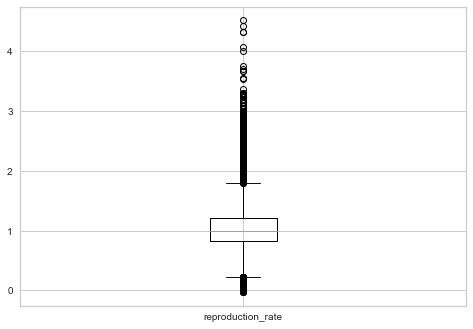

In [7]:
boxplot = covid_df.boxplot(column=[ 'reproduction_rate']) 

The reproduction rate, or reproduction number, is an epidemiologic metric used to describe the contagiousness or transmissibility of infections agents. Outbreaks are expected to continue if this rate is larger than one. If the rate is less than one, then the outbreak is beginning to slow or decrease overall. The mean and median values for reproduction_rate in this dataset are centered around 1. At 1, we would expect a strong level of contagiousness or transmissibility. This graph also identifies that there are many outliers far greater than 1. Those outliers could be due to the Omicron variant that is more transmissible than the previous variants. Those specific outliers would be good candidates for inspection in a future analysis.

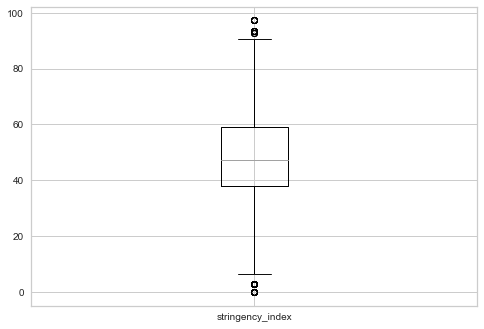

In [8]:
boxplot = covid_df.boxplot(column=[ 'stringency_index'])

The graph suggest that most locations adopted moderate restrictions during the pandemic. Furthermore, some locations did not adopt any restrictions.

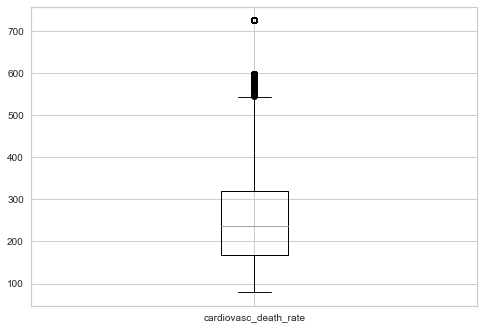

In [9]:
boxplot = covid_df.boxplot(column=[ 'cardiovasc_death_rate'])

This boxplot shows that the values for the cardiovascular death rate were centered around 200 and 300 deaths per 100,000 people. After inspection, this attribute may not be useful in future models due to its relevance.

        new_deaths  human_development_index  reproduction_rate  \
493           91.0                 0.511000           0.980000   
24994          0.0                 0.563000           0.350000   
122783         0.0                 0.806000           0.880000   
24316         26.0                 0.594000           1.100000   
123452         1.0                 0.796000           0.930000   
...            ...                      ...                ...   
95360          0.0                 0.686773           1.384486   
94694          4.0                 0.829000           2.210000   
94027          0.0                 0.737000           1.320000   
102285         1.0                 0.394000           1.330000   
154092         7.0                 0.571000           0.810000   

        stringency_index  new_vaccinations_smoothed  
493            46.300000                    14115.0  
24994          29.630000                     2773.0  
122783         32.410000                    1

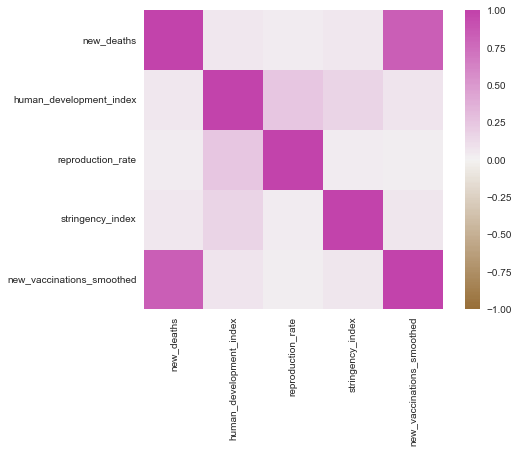

In [10]:
selected_columns = covid_df[["new_deaths","human_development_index","reproduction_rate","stringency_index","new_vaccinations_smoothed"]]
new_df = selected_columns.copy()
print(new_df)
corr = new_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax = 1, center =0,
    cmap=sns.diverging_palette(50, 5000, n=200),
    square=True
)

**Human Development Index, Reproduction Rate, Stringency index, New Vaccinations Smoothed and New Cases Heatmap**  
It is interesting to see that the New Vaccinations Smoothed attribute is highly correlated with New Deaths. I would assume that the more people who die because of this disease, the more one would want to get vaccinated for it (or governments pushing for vaccinations).  Another interesting feature of this graph is that the human-development-index is quite correlated with the Covid reproduction rate, as in the higher the index the higher the reproduction rate.  I can't think why that would be; I would think it would be the other way around. Also, the stringency index is correlated with New Vaccinations Smoothed which seems likely but it is also correlated with the human development index.  And, it is not correlated with reproduction rate.  If it had been correlated with reproduction rate, I would think it would have been negatively correlated.

## Modeling and Evaluation 1
### Train and Adjust Parameters

>For this analysis, we elected to run different clustering models based on the properties of the dataset. Since our dataset had over 30,000 observations and fifteen attributes, we chose clustering methods suited for larger datasets. These methods include k-means clustering, small-batch k-means clustering, and spectral clustering. 


>To begin this portion of the analysis, we first began by creating a function that will be used to execute KMeans clustering. Once completed, this method requires the user to select a value for k before running the model. To determine the optimal k value, we used a distortion score elbow method and calculated the silhouette coefficient to find the best value. The execution of the clustering and the determiniation of k can be seen in the code and figures below. 

>After graphing the distortion score elbow and creating the silhoutte graphs, the results suggest that there could be more the one suitable value for k. Since different values were suggested, we further examined the raw data shown above the silhouette coefficients and how the clustering method chose to divide the data. After examiniation of that data, the model with two clusters appeared to be better organized than the model with three or four clusters. Due to the nature of the data, we felt that two clusters would suit this data better. A visulization of the parameter adjustments and alterations for k can be seen below.

In [11]:
#K-Means works with Numeric Data
cluster_data = covid_df
df=cluster_data

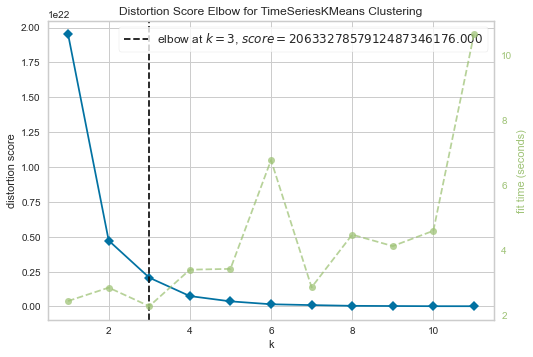

<AxesSubplot:title={'center':'Distortion Score Elbow for TimeSeriesKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import KElbowVisualizer

TSKM_model = TimeSeriesKMeans()
visualizer = KElbowVisualizer(TSKM_model, k=(1,12))

visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.show()

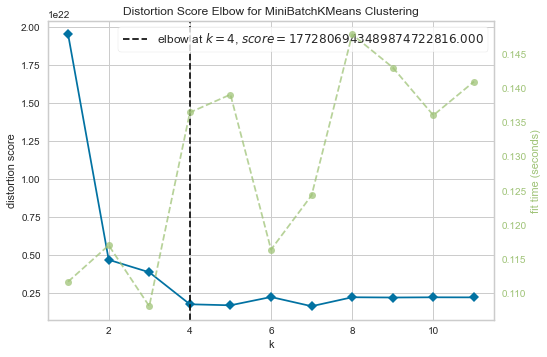

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Instantiate the clustering model and visualizer


# Setting batch_size to 2048 to work around a known memory leak for MiniBatchKMeans on Windows

MBKM_model = MiniBatchKMeans(batch_size = 2048)
visualizer = KElbowVisualizer(MBKM_model, k=(1,12))

visualizer.fit(cluster_data)        # Fit the data to the visualizer
visualizer.show()

,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,220.8,1.1,1090045.5,47.5,235589584.8,572.9,39.3,14.3,34521.6,218.7,8.1,54.7,4.5,79.0,0.9
1,119.5,0.9,345993.9,47.9,98832179.2,159.6,24.2,4.7,9313.9,279.2,7.3,45.3,1.9,69.1,0.6


,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,75.6,1.1,149249.6,51.1,47976538.2,572.7,33.4,9.8,14168.9,363.9,8.9,68.3,4.1,74.7,0.8
1,107.7,0.9,301422.4,44.1,89708266.1,142.5,21.7,3.9,5869.3,280.7,6.0,34.0,1.6,66.0,0.6
2,258.3,1.1,1263319.7,49.4,275639549.9,401.1,37.7,13.0,36419.7,172.2,8.6,54.1,3.7,79.5,0.9


,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,80.2,1.1,156699.2,51.0,5.053599e+07,595.1,33.5,10.0,13629.4,370.9,8.7,68.1,4.2,74.6,0.8
1,108.2,0.9,301887.7,44.2,8.972381e+07,141.9,21.7,3.9,5867.8,280.5,6.0,34.2,1.6,66.1,0.6
2,93.3,1.1,421298.3,49.4,9.555717e+07,405.1,37.5,12.8,36104.0,173.3,8.7,54.1,3.7,79.6,0.9
3,4785.3,1.1,24513458.2,49.8,5.244175e+09,169.4,37.5,13.4,37131.8,201.4,8.3,66.1,4.4,76.8,0.8


Wall time: 1min 33s


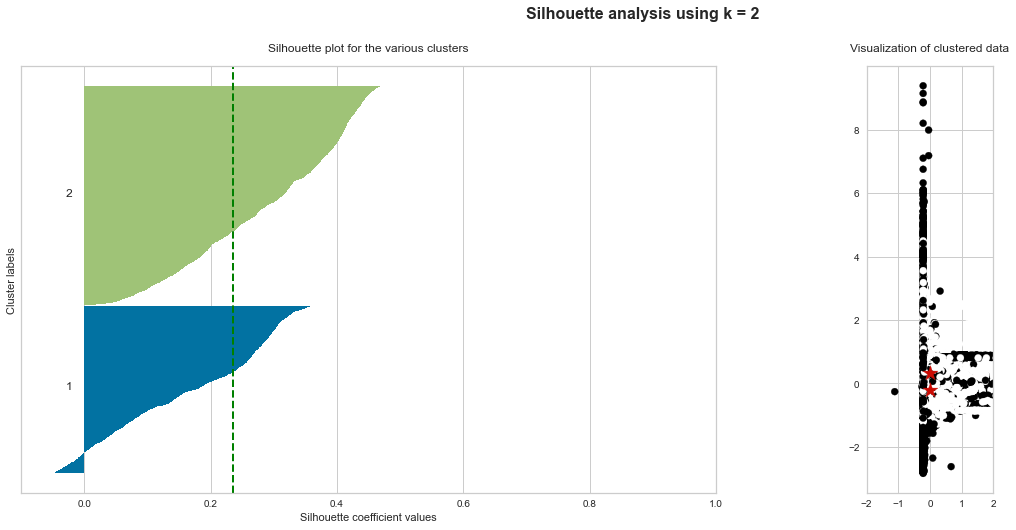

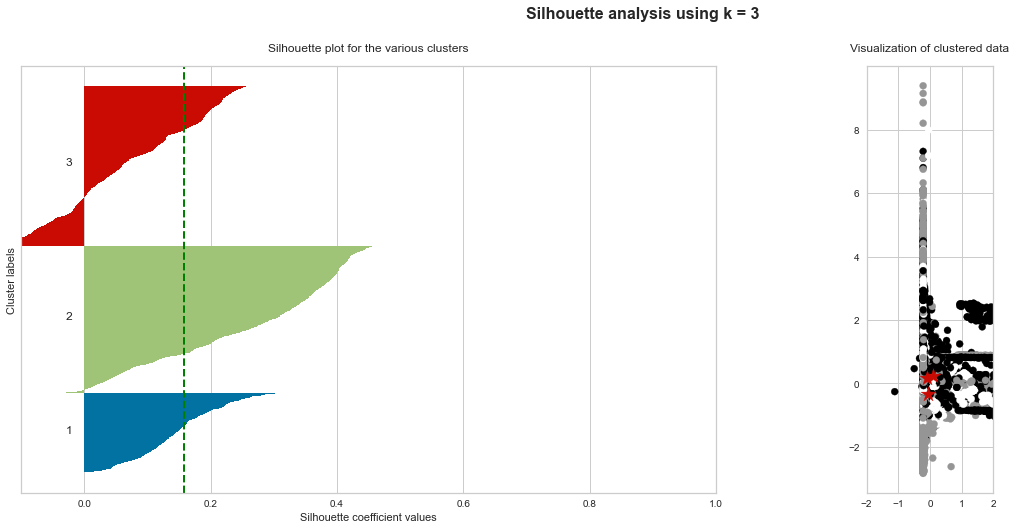

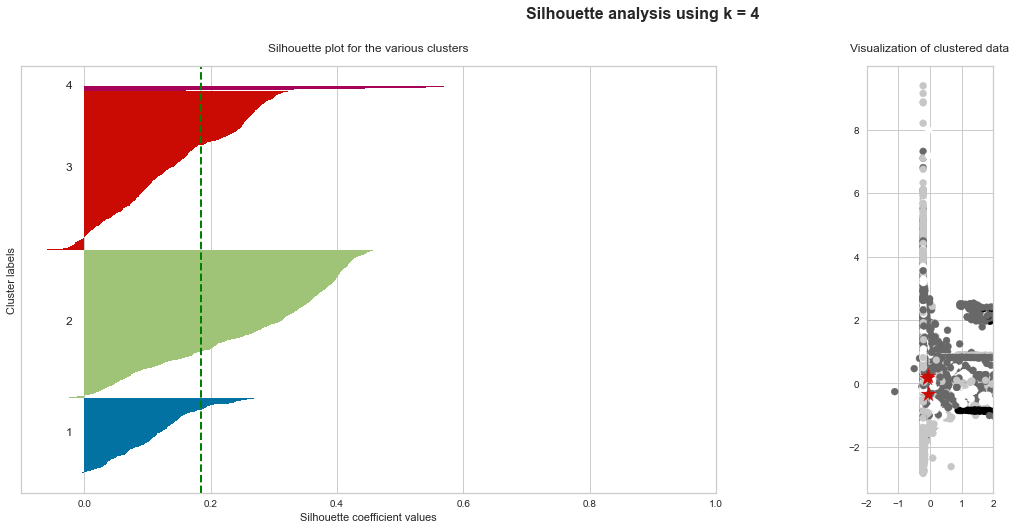

In [14]:
%%time
X_std = StandardScaler().fit_transform(df)
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = TimeSeriesKMeans(n_clusters=k, max_iter=3,
                random_state=0)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    display(df.groupby([labels]).mean().round(1))

,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,205.0,1.1,922539.7,49.7,204600888.8,476.0,36.6,12.2,29902.3,220.9,8.7,58.1,3.8,78.3,0.8
1,102.5,0.9,295078.4,44.8,89766651.5,136.9,22.0,4.0,6051.0,299.9,6.2,36.7,1.8,66.3,0.6


,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,220.9,1.2,1052166.0,44.7,231349045.8,786.9,41.4,17.1,38184.6,200.8,6.7,49.2,5.2,80.3,0.9
1,183.5,1.0,746038.1,54.2,172131160.9,203.1,30.8,7.3,19283.6,260.5,9.8,65.7,2.4,75.3,0.7
2,75.9,0.9,171280.6,40.4,64445344.6,114.6,20.2,3.4,4213.2,292.1,5.2,23.9,1.7,63.7,0.5


,new_deaths,reproduction_rate,new_vaccinations_smoothed,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,92.2,0.9,202265.8,40.6,7.215485e+07,117.3,20.6,3.6,4628.9,297.7,5.3,26.5,1.8,64.2,0.6
1,4090.8,1.2,20861232.1,50.3,4.598738e+09,154.5,37.8,13.8,42830.0,191.7,7.6,61.2,4.3,77.6,0.8
2,71.1,1.2,140743.9,44.0,4.062100e+07,744.6,41.2,16.8,34934.9,218.9,6.8,50.3,5.1,79.9,0.9
3,87.2,1.0,395223.7,56.0,8.605073e+07,216.0,30.4,6.8,20270.6,246.5,10.1,66.2,2.3,75.6,0.7


Wall time: 1min 30s


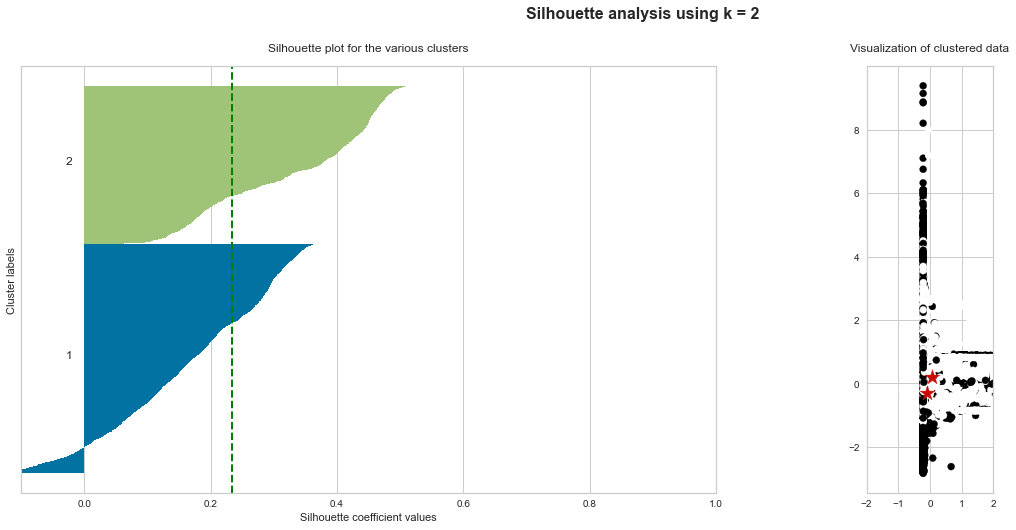

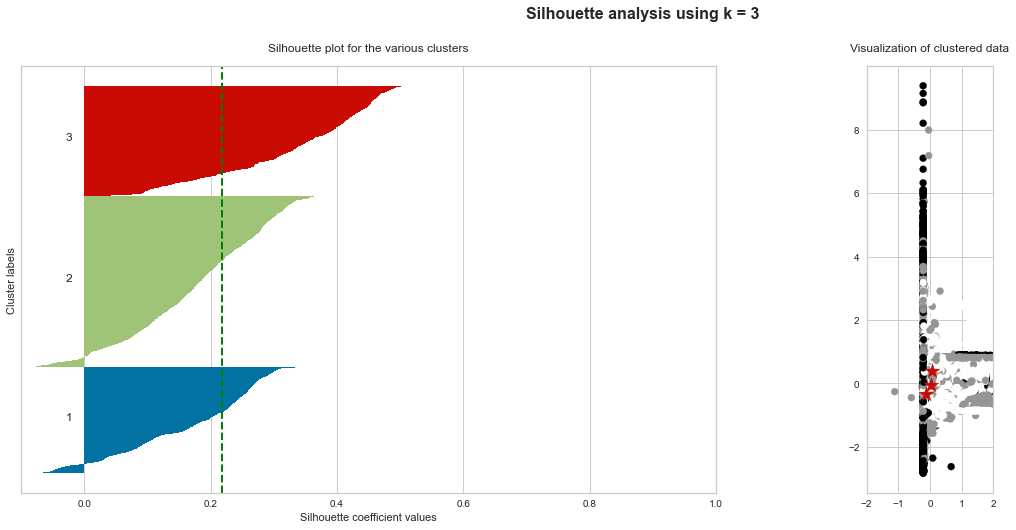

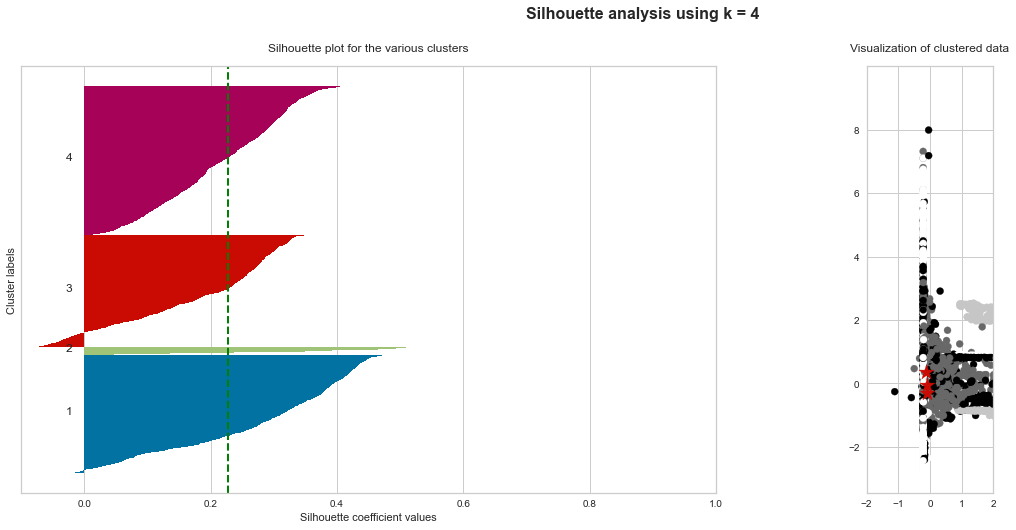

In [15]:
%%time
X_std = StandardScaler().fit_transform(df)
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = MiniBatchKMeans(n_clusters=k, max_iter=3,batch_size = 2048,
                random_state=0)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
    
    display(df.groupby([labels]).mean().round(1))

Wall time: 13min 9s
Parser   : 3.54 s


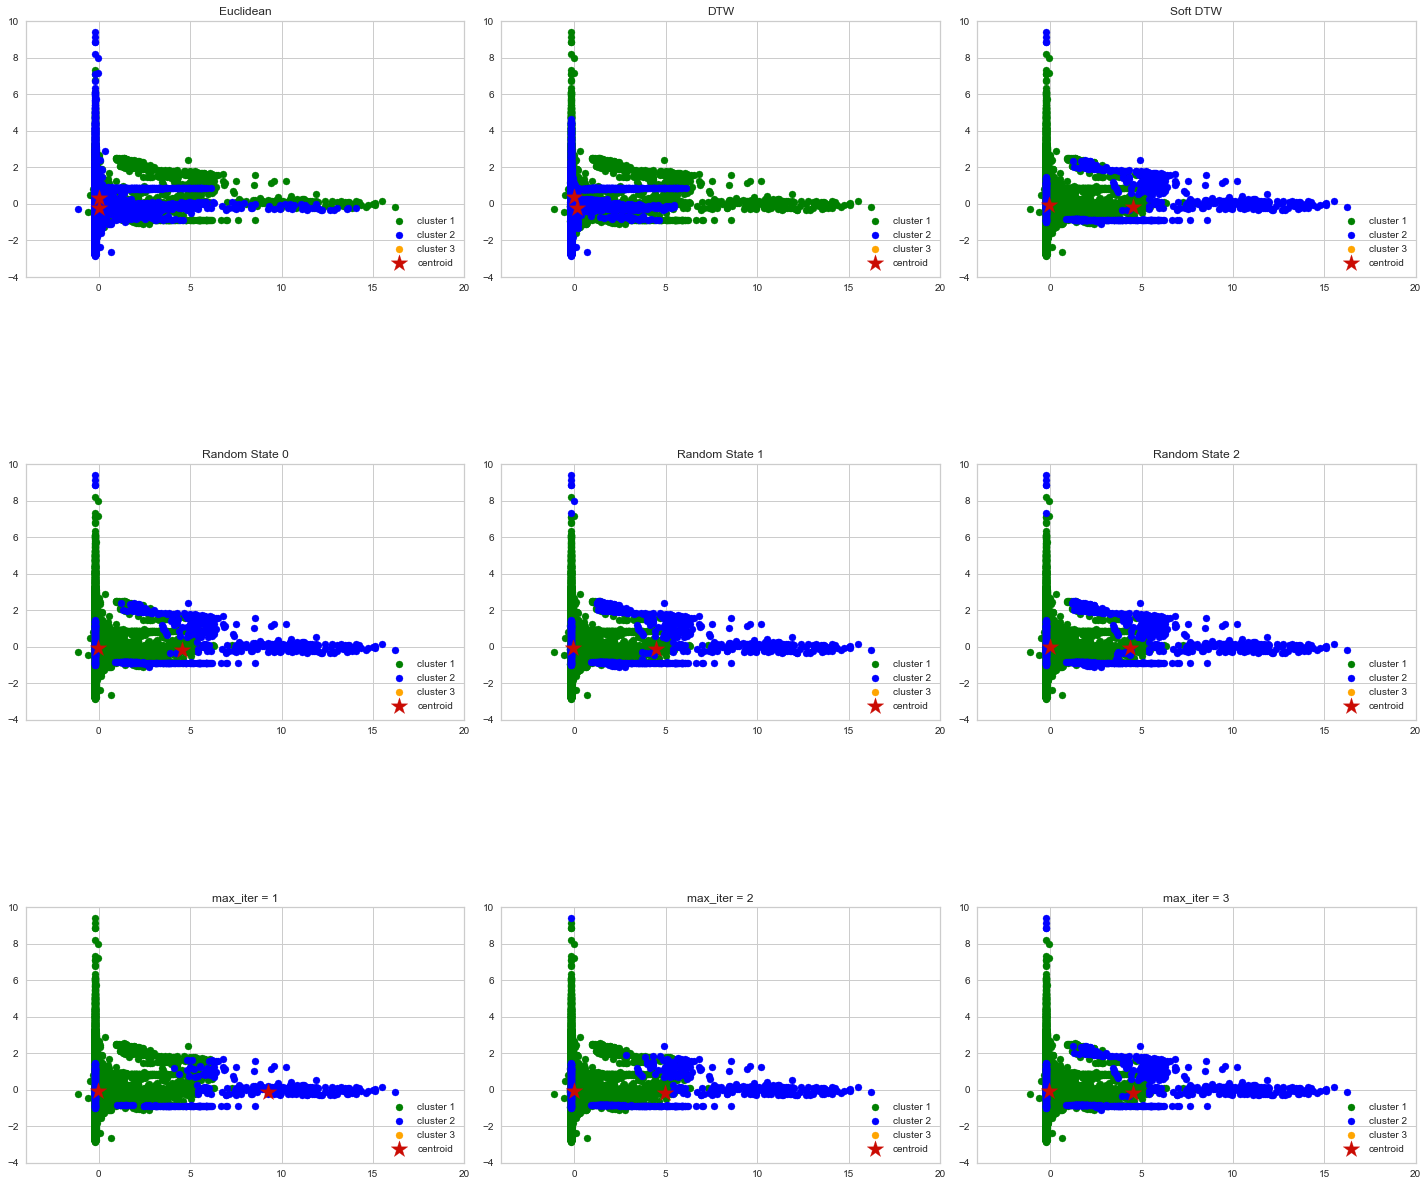

In [16]:
%%time
df=cluster_data
X_std = StandardScaler().fit_transform(df)
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = np.ravel(ax)
centers = []



# Run local implementation of kmeans



#ALTERING METRICS
##Euclidean
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=0,
                     metric='euclidean')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[0].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[0].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[0].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[0].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[0].set_xlim([-4, 20])
ax[0].set_ylim([-4, 10])
ax[0].legend(loc='lower right')
ax[0].set_title('Euclidean')
ax[0].set_aspect('equal')








## DTW
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=0,
                     metric='dtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[1].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[1].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[1].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[1].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[1].set_xlim([-4, 20])
ax[1].set_ylim([-4, 10])
ax[1].legend(loc='lower right')
ax[1].set_title('DTW')
ax[1].set_aspect('equal')

##SoftDTW
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=0,
                     metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[2].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[2].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[2].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[2].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[2].set_xlim([-4, 20])
ax[2].set_ylim([-4, 10])
ax[2].legend(loc='lower right')
ax[2].set_title('Soft DTW')
ax[2].set_aspect('equal')





##Radom State 0
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=0,
                     metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[3].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[3].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[3].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[3].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[3].set_xlim([-4, 20])
ax[3].set_ylim([-4, 10])
ax[3].legend(loc='lower right')
ax[3].set_title('Random State 0')
ax[3].set_aspect('equal')



##Radom State 1
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=1,
                     metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[4].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[4].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[4].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[4].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[4].set_xlim([-4, 20])
ax[4].set_ylim([-4, 10])
ax[4].legend(loc='lower right')
ax[4].set_title('Random State 1')
ax[4].set_aspect('equal')





##Radom State 2
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=2,
                     metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[5].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[5].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[5].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[5].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[5].set_xlim([-4, 20])
ax[5].set_ylim([-4, 10])
ax[5].legend(loc='lower right')
ax[5].set_title('Random State 2')
ax[5].set_aspect('equal')






##max_iter 1
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=1,
                random_state=0,
                     metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[6].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[6].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[6].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[6].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[6].set_xlim([-4, 20])
ax[6].set_ylim([-4, 10])
ax[6].legend(loc='lower right')
ax[6].set_title('max_iter = 1')
ax[6].set_aspect('equal')





##max_iter 2
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=2,
                random_state=0,
                     metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[7].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[7].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[7].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[7].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[7].set_xlim([-4, 20])
ax[7].set_ylim([-4, 10])
ax[7].legend(loc='lower right')
ax[7].set_title('max_iter = 2')
ax[7].set_aspect('equal')




##max_iter 3
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=0,
                     metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_
centers.append(centroids)
ax[8].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
ax[8].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
ax[8].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
ax[8].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
ax[8].set_xlim([-4, 20])
ax[8].set_ylim([-4, 10])
ax[8].legend(loc='lower right')
ax[8].set_title('max_iter = 3')
ax[8].set_aspect('equal')






plt.tight_layout();

>Multiple cluster visualizations were created to examine the impact of using different values for each of the parameters. The three parameters examined were metric, random_state, and max_iter. 

>The first row shows the results of altering the metric parameter. We tried euclidean, dynamic time warping (DTW), and soft dynamic time warping (soft DTW). The Euclidean metric measures distance or closeness to other data points, while dynamic time warping is equivalent to minimizing the euclidean distance between aligned time series under all admissible temporal alignments. Lastly, while similar to DTW, soft DTW takes into account another calculation method to help the function divide the data into clusters. After examining the results, we found that Soft DTW created the most distinct clusters for this particular dataset. 

>The second row shows the results after testing visualizations using three different values for random_state: 0, 1, and 2. For this function, random_state is used for reproducing your results every time the cluster model is run. As depicted in the graphs above, each time the random_state changed, the model's results changed. From this visualization, we agreed that a random state of 0 should be used throughout the analysis. While it could have been set to another number, we ensured that all clustering functions would use 0 as a random state to reproduce results. 

>The last row of the graphs shown above shows the effects of altering the max iterations. This is the number of max iterations the algorithm will use for the model in a single run. While more iterations could potentially yield more accurate results, there is a time trade-off. So, in this case, "too many" iterations would be a number that would cause the model to take too long to complete. While the value for max iterations can run past 100 and the default is 100, we used three to save time and yield preliminary results for the model. We could further explore these parameters and try higher maximum iterations in the future. 

## Modeling and Evaluation 2

### Evaluate and Compare  <br>


In [17]:
def bench_k_means(kmeans, name, X_std, labels):
   
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(X_std)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            X_std,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

<a id= "Summary Table"></a>

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
km = TimeSeriesKMeans(n_clusters=3, max_iter=3,
            random_state=0, metric='softdtw')
labels = km.fit_predict(X_std)
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", X_std=X_std, labels=labels)

means = MiniBatchKMeans(init="k-means++", n_clusters=3, n_init=10, random_state=0)
bench_k_means(kmeans=kmeans, name="Mini-Batch", X_std=X_std, labels=labels)

kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=0)
bench_k_means(kmeans=kmeans, name="random", X_std=X_std, labels=labels)

kmeans = TimeSeriesKMeans(init="k-means++", n_clusters=3, n_init=10, random_state=0)
bench_k_means(kmeans=kmeans, name="TS", X_std=X_std, labels=labels)

pca = PCA(n_components=3).fit(X_std)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1, random_state=0)
bench_k_means(kmeans=kmeans, name="PCA-based", X_std=X_std, labels=labels)

print(82 * "_")



__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.183s	355795	0.472	0.060	0.106	0.040	0.106	0.268
Mini-Batch	0.200s	355795	0.472	0.060	0.106	0.040	0.106	0.266
random   	0.235s	355795	0.472	0.060	0.106	0.040	0.106	0.247
TS       	76.427s	10	0.472	0.060	0.106	0.040	0.106	0.269
PCA-based	0.036s	379016	0.141	0.013	0.023	0.003	0.023	0.220
__________________________________________________________________________________


>To further explore the different parameters and functions for clustering, we tested different methods for the init. The methods tested are as follows: k-means++, MiniBatch, random, time series, and kmeans-pca. The table above displays the results from each of the various methods. The results show that Mini Batch and Time Series seem to yeild the best silhouette values. As we move forward with the analysis, there will be an emphasis and deeper exploration for those two methods of clustering. 

## Modeling and Evaluation 3
### Visualize results <br>


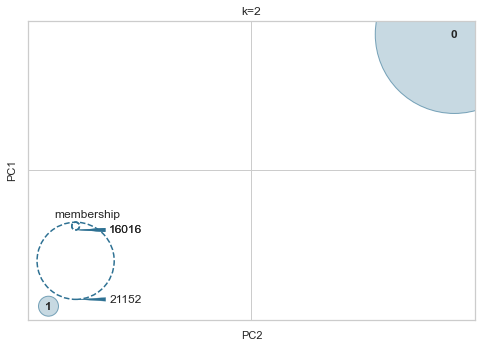

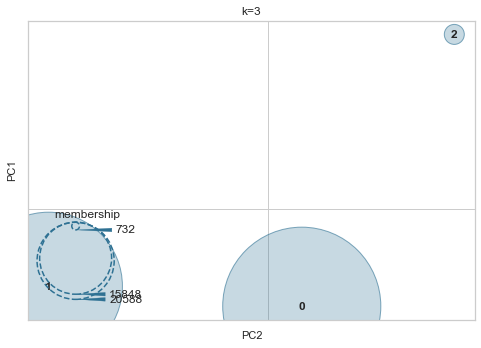

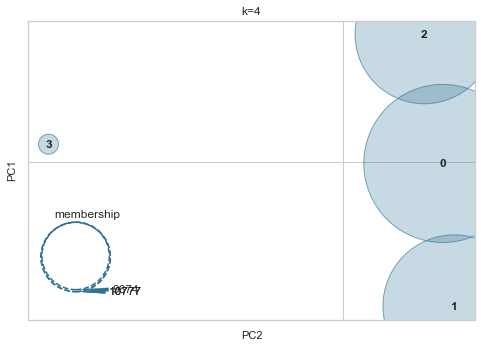

In [19]:
# Instantiate the clustering model and visualizer

i=[2,3,4]
name = ["k=2", "k=3","k=4"]
for i,name in zip(i,name):
    KMmodel = KMeans(i, random_state = 0)
    visualizer = InterclusterDistance(KMmodel, title=name)

    visualizer.fit(X_std)        # Fit the data to the visualizer
    visualizer.show()           # Finalize and render the figure
    

>The graph above shows the intercluster distance, or the distance between two objects belonging to different clusters. The graph was generated three times, each with different k values (k=2,3,4). After examining the results, the graphs suggest that k=2 provides the best results for the clustering model. Examining the first graph where k=2, the PC1 and PC2 lines clearly separate the clusters and are suitably distanced from the two clusters that were created for that model. While models with k=3 and k=4 are performed well, they do not have as strong of a distinction between groups. The weak distinction is supported by the overlap of groups the intersection of the PC lines with the clusters. 

>Continuing to use k=2 as the k value for the two kmeans clustering methods, a visualization of the clustered data can be seen below. 

Wall time: 1min 43s


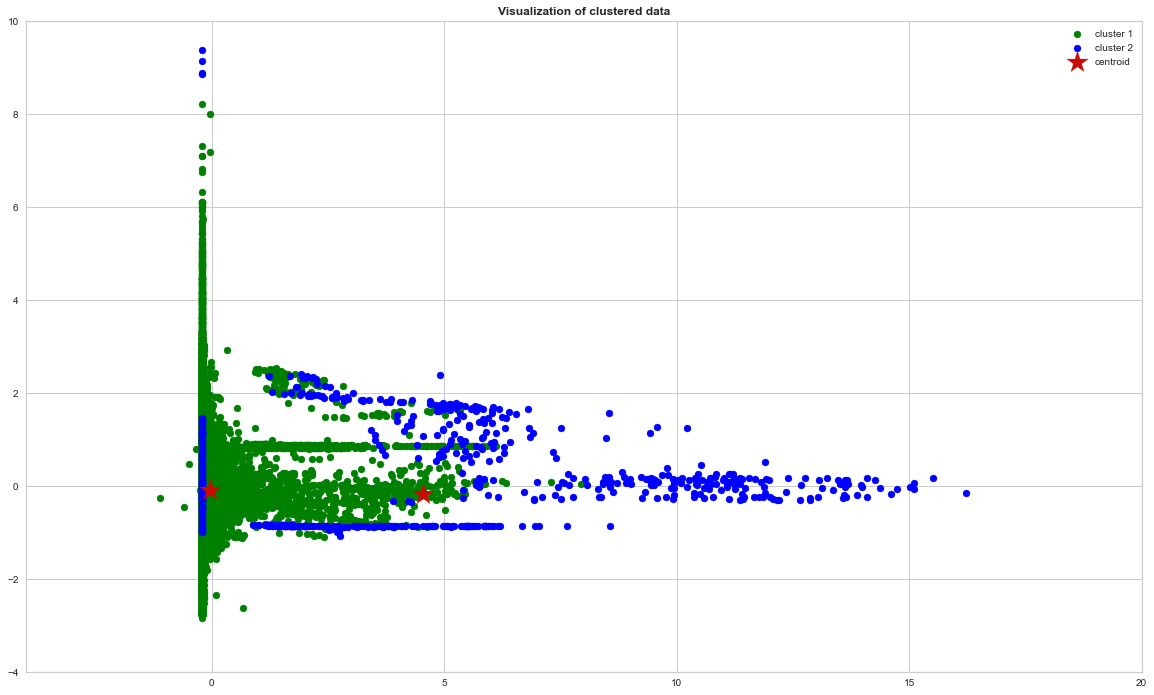

In [20]:
%%time
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = TimeSeriesKMeans(n_clusters=2,
                max_iter=3,
                random_state=0, metric='softdtw')
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(20, 20))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=500,
            c='r', label='centroid')
plt.legend()
plt.xlim([-4, 20])
plt.ylim([-4, 10])
#plt.xlabel('')
#plt.ylabel('')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

> The k-means clustering method used above is Time Series K means (soft dtw). The graph suggest that the centroids are distinctly separated. Also, two clear groups can be seen. To compare, we executed a similar model using mini batch. 

[1 1 1 ... 1 1 1]


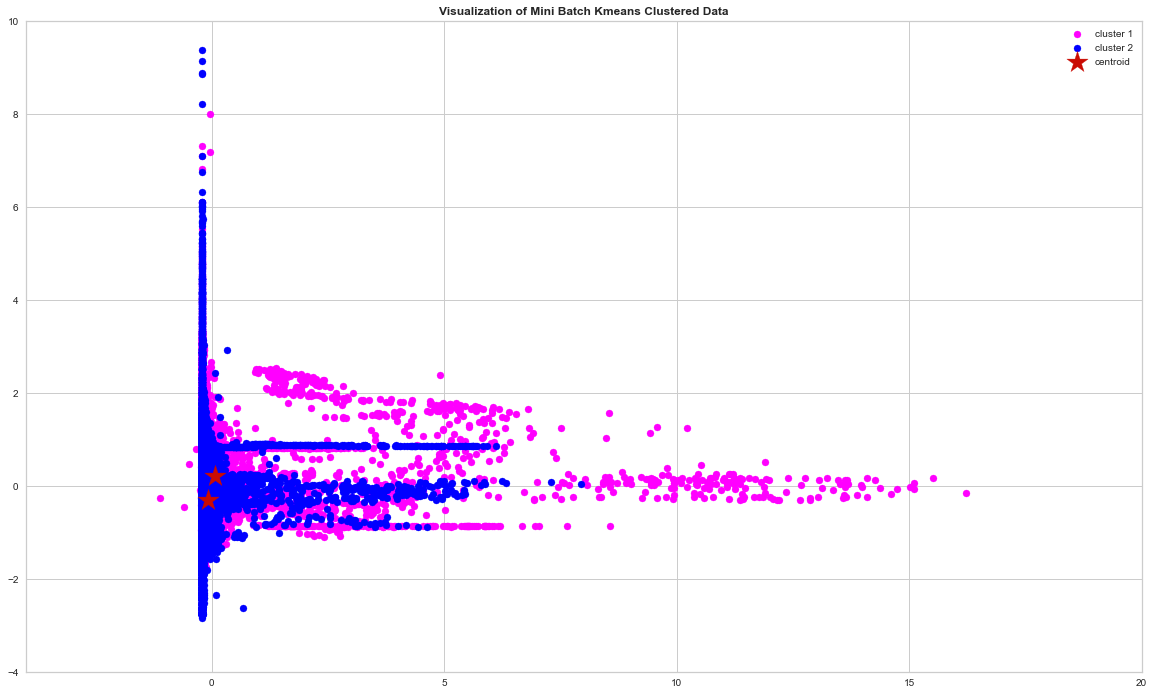

In [21]:
# Mini Batch KMeans Clustering
  
 # Standardize the data
X_std = StandardScaler().fit_transform(df)   
    
    
# perform the mini batch K-means
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 2,
                      batch_size = 2048, n_init = 100,
                      max_no_improvement = 100, verbose = 0, random_state = 0)
  
mbk.fit(X_std)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(df, mbk_means_cluster_centers)
  
# print the labels of each data
print(mbk_means_labels)
mbk.fit(X_std)
centroids = mbk.cluster_centers_


# Plot the clustered data
fig, ax = plt.subplots(figsize=(20, 20))
plt.scatter(X_std[mbk.labels_ == 0, 0], X_std[mbk.labels_ == 0, 1],
            c='magenta', label='cluster 1')
plt.scatter(X_std[mbk.labels_ == 1, 0], X_std[mbk.labels_ == 1, 1],
            c='blue', label='cluster 2')


plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=500,
            c='r', label='centroid')
plt.legend()
plt.xlim([-4, 20])
plt.ylim([-4, 10])
#plt.xlabel('')
#plt.ylabel('')
plt.title('Visualization of Mini Batch Kmeans Clustered Data', fontweight='bold')
ax.set_aspect('equal');

>While two distinct groups can be seen in this graph, the centroids are closer together than the ones produced by the Time Series method. Nonetheless, Mini batch and Time Series K Means methods performed the best out of the other methods performed in the analysis of this dataset. 

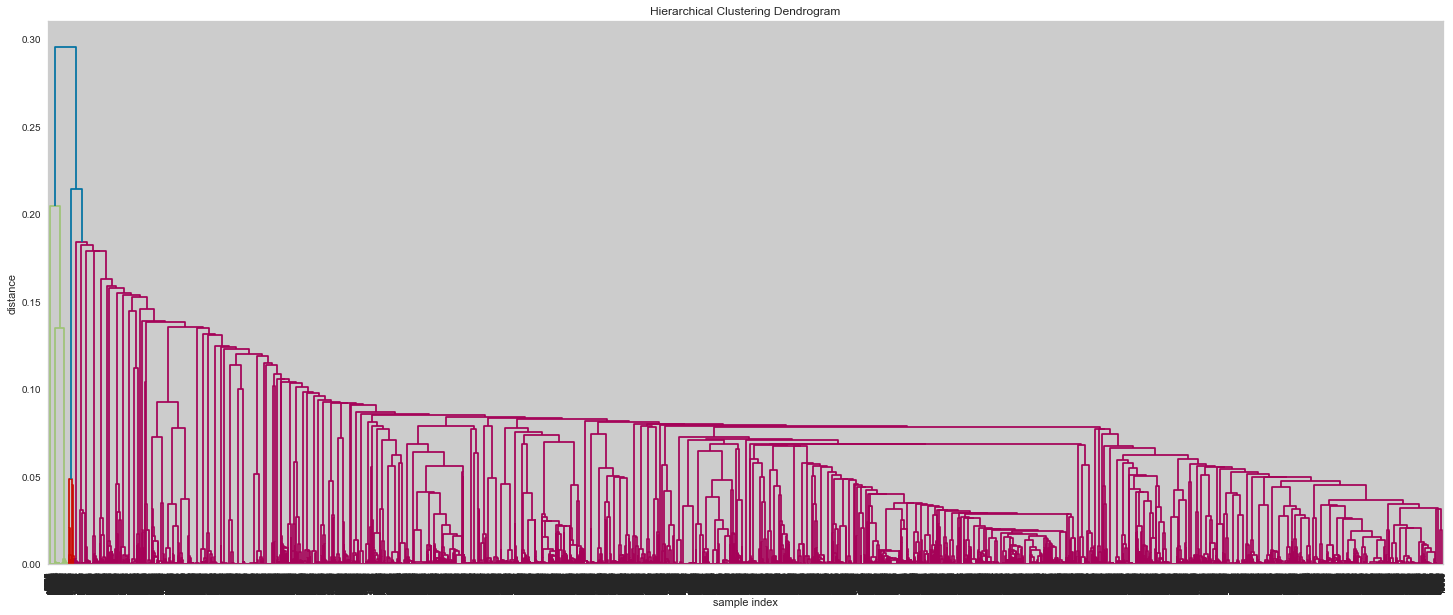

Wall time: 7min 2s


In [22]:
%%time
# clustering
Z = hac.linkage(X_std, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

##  Modeling and Evaluation 4

### Summarize the Ramifications <br>


>The Mini-batch Kmeans silhouette coefficient for the silhouette plot of two clusters was also the highest at 0.24, which was the same as the Elbow graph for the Mini-batch Kmeans model which determined two clusters as optimal.  

>The parameters for the Time-series Kmeans model were adjusted and compared in a set of charts to determine what parameters were optimal. Of the Euclidean, DTW and Soft DTW metric, the Soft DTW was optimal, as was Random state=0 and max_iterations = 3. These parameters gave more balanced and separated centroids.

>Based on the metrics Homogeneity scores, completeness scores, v_measure scores, adjusted rand scores & adjusted mutual info scores as well as the silhouette scores the model that is the most representative of the data can be seen in the <a href="#Summary Table">Summary Table</a>.
The V_measure for Time series model is higher that all others but its completeness score is lower. Time-series,  K-means ++, random, and mini-batch both have the highest ARI and AMI scores, but k-means ++ and Mini-batch have the two highest silhouette scores.

>An intercluster distance visualizer of the Kmeans model shows that two clusters are the most separated and three and 4 clusters attempt to separate a large chunk of data that is much closer together. The clusters are sized by membership, that is, the number of instances in the cluster is reflected by its size. Of the two clusters one is much larger than the other visualizing that there are more "members" in the larger cluster that the smaller one.   

>The Time series model and the Mini-batch models were plotted for visualization using two clusters, a batch size of 2048, and a random state of zero. 

>We tried using a hierarchical clustering model and got an interesting dendrogram, but our data was too massive, and we could not separate the features. However, the dendrogram mirrors the clustering decisions of the Kmeans model with a very large cluster and a much smaller cluster.  
 

## Deployment

### Did you achieve your goals?  <br>
>For this analysis, we wanted to study and create different clustering models that would successfully group a collection of objects so that objects in the same group are more similar than objects in other groups. After creation, examining these clusters or subclasses revealed patterns associated with the topic being studied. For this particular dataset, observations were divided into three clusters. With further analysis, we discovered potential reasons why a certain group yeilded one type of results as opposed to the types of results of the other clusters. 

### How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?  <br>

>The models created for this analysis use different clustering methods to separate the data into three distinct groups or categories. While many of these models may have already been created, there is still a lot unknown about Covid-19. So, companies and organizations are eager to obtain any data and information on Covid-19. Companies may wish to study the reason for the different clusters. Exploring what causes the separation of the groups could lead to the company finding an unconsidered attribute. Companies may decide to incorporate the new attribute into the dataset in the future. Companies and organizations such as the CDC, Baylor Scott and White, and other participants in the health industry may be interested in these types of models. 

### How would your deploy your model for interested parties? <br>

>The dataset used for this analysis was partially obtained from The Covid-19 Data Repository, which is for the Coronavirus Visual Dashboard by the Center for Systems Science and Engineering at Johns Hopkins University, and many other official sources. Since the pandemic's beginning, many people and groups within the health sector have been contributing and building datasets to study Covid-19. Like these groups, our model could also be deployed to GitHub, and we could allow the public to download, execute, and study our models. To specifically deploy our models to interested parties, we could collaborate with non-profit public health organizations that collaborate with hospitals, primary care facilities, and other health establishments. 

### What other data should be collected? <br>

>Other data that should be collected may include observations for the variants of Covid-19. Since the viruses continues to mutate, there may be other features that could be implemented in the model. Futhermore, we may discover that some features in the original model are no longer relevant.
Another data category that could be useful for analyzing Covid-19 could be symptoms. Throughout the pandemic, different people have been experiencing many different symptoms and enduring many different outcomes from the virus. By analyzing these symptoms, we may be able to better predict the outcomes of getting infected by Covid-19. Exploring granular observations for a particular geographic location, such as the United States could be another area of interest.Lastly, to better understand the impact of Covid, collecting disability data to understand the magnitude of long Covid.

 ### How often would the model need to be updated, etc.? <br>
    
>Every day, new data is being created, particularly for Covid-19. As a result, predictive models need to be updated. As we learn more about Covid-19, many new variables may become relevant. While predictive models are capable of handling a lot of new data, too much buildup of new data may cause the models to lose their effectiveness over time. After a month, quarter, or year, updating predictive models with new data is probably necessary. In order to determine how often a model should be updated, one has to consider how often the data is changing and how often decisions are being made off the model. If data is changing very rapidly or decisions are being made often, frequent updates may be best. When updating the model, you should be sure to investigate the new data, adjust the model, and reevaluate any assumptions made in the creation process.     

## Exceptional Work

### You have free reign to provide additional analyses or combine analyses. <br>

>For our exceptional work we used all of the Yellow Brick clustering visualizers on our data and we ran PCA on the data first for one of our clustering models to reduce dimensionality, however this model was sub-optimal to Kmeans++, Mini-batch Kmeans, and Time-series Kmeans.  We also ran a hierarchical clustering model against our data and got comparable clustering with Kmeans however, the data were too massive and we could not get labeling on the x-axis. 